# Migros Online Case Study

## Main tasks:

    1. Analyze the data, show us what you did/would do and explain us how to interpret results. You are free to use any tools you like.
    2. Describe a model you would choose to provide a website personalization solution. Define your own (imaginary) goal for this personalization.  How would you adjust the model/analysis if used regularly.
    3. Describe at least one way of how to deploy your solution in terms of software architechture. You can make assumptions on how you would receive this data and show us a pipeline. (If you have some prior knowledge consider GCP as an environment.)

In [1]:
import pandas as pd
import numpy as np

import sklearn as sk

import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

c:\users\norbert\appdata\local\programs\python\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\norbert\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\norbert\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('interview_case_study.csv', header = 0, 
                 names = ['transactions','loyalty','days_since_last_contact','gender','person_id',
                          'product_ids','One.hot.1','One.hot.2','One.hot.3','One.hot.4'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transactions             100 non-null    int64  
 1   loyalty                  100 non-null    float64
 2   days_since_last_contact  100 non-null    int64  
 3   gender                   100 non-null    object 
 4   person_id                100 non-null    object 
 5   product_ids              100 non-null    object 
 6   One.hot.1                100 non-null    int64  
 7   One.hot.2                100 non-null    int64  
 8   One.hot.3                100 non-null    int64  
 9   One.hot.4                100 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 7.9+ KB


### Data Pre-processing

In [3]:
df['gender'] = pd.Categorical(df['gender'])
#df['product_ids'] = pd.Series(df['product_ids'])

df['One.hot.1'] = pd.Categorical(df['One.hot.1'])
df['One.hot.2'] = pd.Categorical(df['One.hot.2'])
df['One.hot.3'] = pd.Categorical(df['One.hot.3'])
df['One.hot.4'] = pd.Categorical(df['One.hot.4'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   transactions             100 non-null    int64   
 1   loyalty                  100 non-null    float64 
 2   days_since_last_contact  100 non-null    int64   
 3   gender                   100 non-null    category
 4   person_id                100 non-null    object  
 5   product_ids              100 non-null    object  
 6   One.hot.1                100 non-null    category
 7   One.hot.2                100 non-null    category
 8   One.hot.3                100 non-null    category
 9   One.hot.4                100 non-null    category
dtypes: category(5), float64(1), int64(2), object(2)
memory usage: 5.0+ KB


#### Demo & Explanation for One-Hot Encodings being present in the data

In [4]:
demo = pd.DataFrame({"grocery_type": ["dairy", "dairy", "vegetable", "meat", "fruit", "meat"]})
print("The original data\n")
print(demo)

print("\n")
print("-" * 30)

demo_new = pd.get_dummies(demo, columns=["grocery_type"], prefix="Product")
print("The transformed data\n")
print(demo_new)

The original data

  grocery_type
0        dairy
1        dairy
2    vegetable
3         meat
4        fruit
5         meat


------------------------------
The transformed data

   Product_dairy  Product_fruit  Product_meat  Product_vegetable
0              1              0             0                  0
1              1              0             0                  0
2              0              0             0                  1
3              0              0             1                  0
4              0              1             0                  0
5              0              0             1                  0


### Discussion (before analysis)

Q: If you look at the data, what do you see? What would you look at in general?

A: This data extract shows 

In [5]:
df.head()

,transactions,loyalty,days_since_last_contact,gender,person_id,product_ids,One.hot.1,One.hot.2,One.hot.3,One.hot.4
0,4,-1.33,2,m,170636bb-3601-4a18-b572-52650c0d2d0e,"[7881,10834,61603,62040,63288,125830]",1,0,0,0
1,6,-0.28,3,m,2a4c9697-b937-4429-9fd3-5529929a1ab9,"[10834,61603,62040,63288,125830]",1,0,0,0
2,5,-0.22,1,w,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,"[63288,125830]",1,0,0,0
3,7,-0.29,0,m,00f173be-96b1-4407-809c-6882e5bbb1fd,"[7881,10834]",0,1,0,0
4,4,1.06,5,m,f5aa1643-398f-4027-ab75-7b72ebe92d90,"[7881,10834,62040,63288,125830]",0,0,1,0


Q: What has been done already? What has not been done? What else should (not)(have) been done?

A:

Q: What problems / challenges would you see?

A:

Q: How would you choose which data to integrate into the model and and how much of it?

A:

Q: How would you show accuracy/ precision or relevant statistics of your chosen model?

A:

## Task 1: Exploratory Data Analysis (mainly visualizations)

In [6]:
df.describe()

,transactions,loyalty,days_since_last_contact
count,100.000000,100.000000,100.000000
mean,6.550000,-0.000090,6.280000
std,2.709411,1.002703,3.861438
min,1.000000,-1.710000,0.000000
25%,5.000000,-0.742500,3.000000
50%,7.000000,-0.100500,5.000000
75%,8.250000,1.032500,9.000000
max,15.000000,1.400000,14.000000


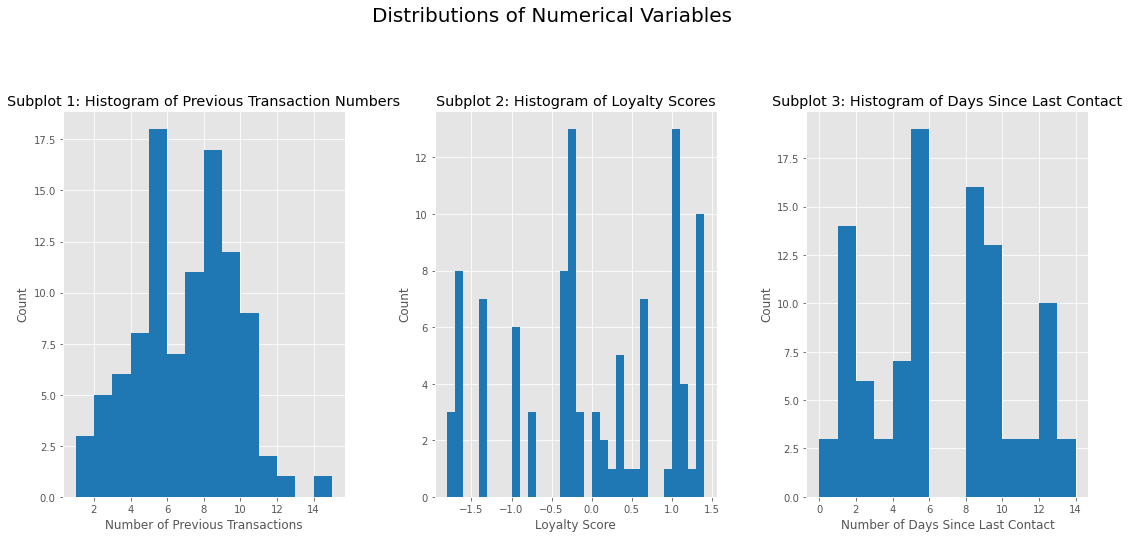

In [7]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(16,8))

# Create subplot 1
ax1 = fig.add_subplot(131) # Grid of 1x3, this is suplot 1
ax1.set_xlabel('Number of Previous Transactions')
ax1.set_ylabel('Count')
ax1.set_title('Subplot 1: Histogram of Previous Transaction Numbers')

ax1 = plt.hist(df['transactions'], bins=np.arange(1,16,1), color = 'tab:blue')

# Create subplot 2
ax2 = fig.add_subplot(132) # Grid of 1x3, this is suplot 2
ax2.set_xlabel('Loyalty Score')
ax2.set_ylabel('Count')
ax2.set_title('Subplot 2: Histogram of Loyalty Scores')

ax2 = plt.hist(df['loyalty'], bins=np.arange(-1.8,1.5,0.1), color = 'tab:blue')

# Create subplot 3
ax3 = fig.add_subplot(133) # Grid of 1x3, this is suplot 3
ax3.set_xlabel('Number of Days Since Last Contact')
ax3.set_ylabel('Count')
ax3.set_title('Subplot 3: Histogram of Days Since Last Contact')

ax3 = plt.hist(df['days_since_last_contact'], bins=np.arange(0,15,1), color = 'tab:blue')

# Add main title
plt.suptitle('Distributions of Numerical Variables', size = 20)

plt.tight_layout(pad=4)
plt.ticklabel_format(style = 'plain')
plt.show()

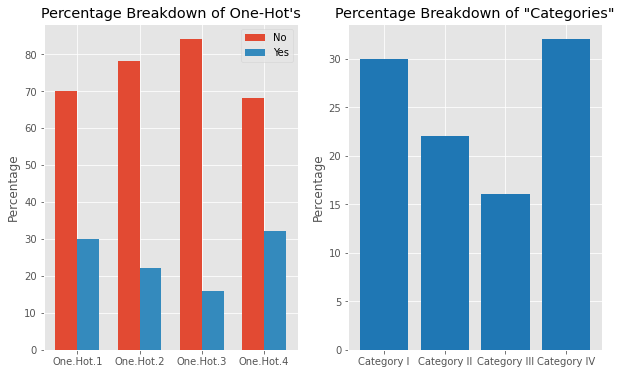

In [8]:
labels = ['One.Hot.1', 'One.Hot.2', 'One.Hot.3', 'One.Hot.4']

labels_category = ['Category I', 'Category II', 'Category III', 'Category IV']


# in this specific case we have sample size = 100, so we don't even need to calculate percentages
# the actual value counts will be the percentage
no_percentage = [df['One.hot.1'].value_counts()[0], df['One.hot.2'].value_counts()[0], 
                 df['One.hot.3'].value_counts()[0], df['One.hot.4'].value_counts()[0]]

yes_percentage = [df['One.hot.1'].value_counts()[1], df['One.hot.2'].value_counts()[1], 
                 df['One.hot.3'].value_counts()[1], df['One.hot.4'].value_counts()[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(121)
ax1.bar(x - width/2, no_percentage, width, label='No')
ax1.bar(x + width/2, yes_percentage, width, label='Yes')

ax1.set_ylabel('Percentage')
ax1.set_title('Percentage Breakdown of One-Hot\'s')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()


ax2 = fig.add_subplot(122)

ax2.set_ylabel('Percentage')
ax2.set_title('Percentage Breakdown of "Categories"')

ax2 = plt.bar(labels_category, yes_percentage, color='tab:blue')

plt.show()

In [9]:
yes_percentage

[30, 22, 16, 32]

### Frequency counts of product IDs

In [10]:
import json

df['processed_product_ids'] = df['product_ids'].apply(lambda x: np.array(json.loads(x)))

In [11]:
df['processed_product_ids'].explode().value_counts()

10834     82
63288     67
125830    67
7881      64
61603     53
62040     49
Name: processed_product_ids, dtype: int64

In [12]:
unique_product_list = df['processed_product_ids'].explode().unique().tolist()
unique_product_list

[7881, 10834, 61603, 62040, 63288, 125830]

TO DO: Explain that there are only 6 unique products

## TASK 2: Market Basket Analysis (Association Analysis) for Personalized Shopping Recommendation

In [13]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Intro to Association Analysis 

Given a set of transactions, find rules that will predict the occurrence of an item based on the occurrences of other items in the transaction. 

For example, “If someone buys beer and sausage, then is likely to buy mustard with high probability“

### Prepare binary matrix with columns corresponding to products and rows corresponding to a person's shopping list

In [60]:
def encode_data(df, person_id, product):
    shopping_list = df[df['person_id'] == person_id]['processed_product_ids'].to_numpy()[0]
    if product in shopping_list:
        return 1
    else:
        return 0
    
encode_data("2a4c9697-b937-4429-9fd3-5529929a1ab9", 62040)

1

In [61]:
def build_market_basket(df):
    unique_product_list = df['processed_product_ids'].explode().unique().tolist()
    products_str = [str(x) for x in unique_product_list]

    market_basket = pd.DataFrame(columns = products_str, index = df['person_id'])

    for person_id in df['person_id'].tolist():
        for product in unique_product_list:
            market_basket.loc[person_id, str(product)] = encode_data(df, person_id, product)

    return market_basket

market_basket = build_market_basket(df)
market_basket

,7881,10834,61603,62040,63288,125830
person_id,,,,,,
170636bb-3601-4a18-b572-52650c0d2d0e,1,1,1,1,1,1
2a4c9697-b937-4429-9fd3-5529929a1ab9,0,1,1,1,1,1
4d12441d-3748-4b05-81bf-fd24f9f9d6f4,0,0,0,0,1,1
00f173be-96b1-4407-809c-6882e5bbb1fd,1,1,0,0,0,0
f5aa1643-398f-4027-ab75-7b72ebe92d90,1,1,0,1,1,1
...,...,...,...,...,...,...
f00c336b-e02c-44e5-8bfa-59b71374fa54,0,0,0,0,1,1
49402263-e3b7-4305-a09e-f5508ab4aa92,0,0,0,0,1,1
ea684db5-6354-4e26-80a5-555115109460,1,1,0,0,0,0


### Applying to the Apriori algorithm to get association rules

In [59]:
def get_association_rules(market_basket, min_support, min_confidence, max_len = 2):
    # compute frequent items using the Apriori algorithm
    frequent_itemsets = apriori(market_basket, min_support = min_support, max_len = max_len, use_colnames=True)

    # compute all association rules for frequent_itemsets
    rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = min_confidence)
    
    return rules

rules = get_association_rules(market_basket, min_support = 0.40, min_confidence = 0.50)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(7881),(10834),0.64,0.82,0.64,1.000000,1.219512,0.1152,inf
1,(10834),(7881),0.82,0.64,0.64,0.780488,1.219512,0.1152,1.640000
2,(61603),(10834),0.53,0.82,0.53,1.000000,1.219512,0.0954,inf
3,(10834),(61603),0.82,0.53,0.53,0.646341,1.219512,0.0954,1.328966
4,(10834),(62040),0.82,0.49,0.49,0.597561,1.219512,0.0882,1.267273
5,(62040),(10834),0.49,0.82,0.49,1.000000,1.219512,0.0882,inf
6,(63288),(10834),0.67,0.82,0.49,0.731343,0.891882,-0.0594,0.670000
7,(10834),(63288),0.82,0.67,0.49,0.597561,0.891882,-0.0594,0.820000
8,(125830),(10834),0.67,0.82,0.49,0.731343,0.891882,-0.0594,0.670000
9,(10834),(125830),0.82,0.67,0.49,0.597561,0.891882,-0.0594,0.820000


In [58]:
def get_rules_look_up(rules):
    rules_look_up = {}

    for idx in range(0, len(rules['antecedents'])):
        if rules.loc[idx, 'antecedents'] in rules_look_up:
            rules_look_up[rules.loc[idx, 'antecedents']] = rules_look_up[rules.loc[idx, 'antecedents']] + list(rules.loc[idx, 'consequents'])
        else:
            rules_look_up[rules.loc[idx, 'antecedents']] = list(rules.loc[idx, 'consequents'])

    return rules_look_up

get_rules_look_up(rules)

{frozenset({'7881'}): ['10834'],
 frozenset({'10834'}): ['7881', '61603', '62040', '63288', '125830'],
 frozenset({'61603'}): ['10834'],
 frozenset({'62040'}): ['10834', '63288', '125830'],
 frozenset({'63288'}): ['10834', '62040', '125830'],
 frozenset({'125830'}): ['10834', '62040', '63288']}

In [47]:
def int_to_frozenset(product_id):
    return frozenset({str(product_id)})
   
int_to_frozenset(7881)

frozenset({'7881'})

In [48]:
def strList_to_intList(lst):
    new_list = []
    for i in lst:
        new_list.append(int(i))
    return new_list

strList_to_intList(['7881', '61603', '62040', '63288', '125830'])

[7881, 61603, 62040, 63288, 125830]

In [56]:
df[df['person_id'] == "4d12441d-3748-4b05-81bf-fd24f9f9d6f4"]['processed_product_ids'].to_numpy()[0].tolist()

[63288, 125830]

In [66]:
def get_shoppingList(person_id):
    return df[df['person_id'] == person_id]['processed_product_ids'].to_numpy()[0].tolist()

get_shoppingList("4d12441d-3748-4b05-81bf-fd24f9f9d6f4")

[63288, 125830]

In [70]:
rules_lookup = get_rules_look_up(rules)

def get_recommendations(person_id):
    products_to_recommend = []
    
    items_bought = get_shoppingList(person_id)
    
    for i in items_bought:
        recommendations = rules_lookup[int_to_frozenset(i)]
        recommendations = strList_to_intList(recommendations)
        products_to_recommend = products_to_recommend + recommendations
    
    final_recommendations = [item for item in products_to_recommend if item not in items_bought]
    
    if len(final_recommendations) == 0:
        final_recommendations = items_bought
        
    return final_recommendations

In [71]:
get_recommendations("4d12441d-3748-4b05-81bf-fd24f9f9d6f4")

[10834, 62040, 10834, 62040]

In [72]:
get_recommendations("170636bb-3601-4a18-b572-52650c0d2d0e")

[7881, 10834, 61603, 62040, 63288, 125830]